Bağımlılıkları Yüklüyoruz

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

CSV dosyasından veri okuma

In [15]:
data = pd.read_csv('Data/diabetes.csv')

Verilerin ilk beş satırını yazdırma

In [16]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Özellik ve örnek sayısı

In [17]:
data.shape

(768, 9)

Veriler için istatistiksel ölçümler

In [18]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Her sonuç durumu için sayı

In [19]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 --> şeker hasta değil

1 --> Şeker hastalı

Sonuçlara göre her özellik için ortalama değeri elde etmek

In [20]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


En alakalı özelliği görmek için her özellik arasındaki korelasyonu hesaplıyoruz

<Axes: >

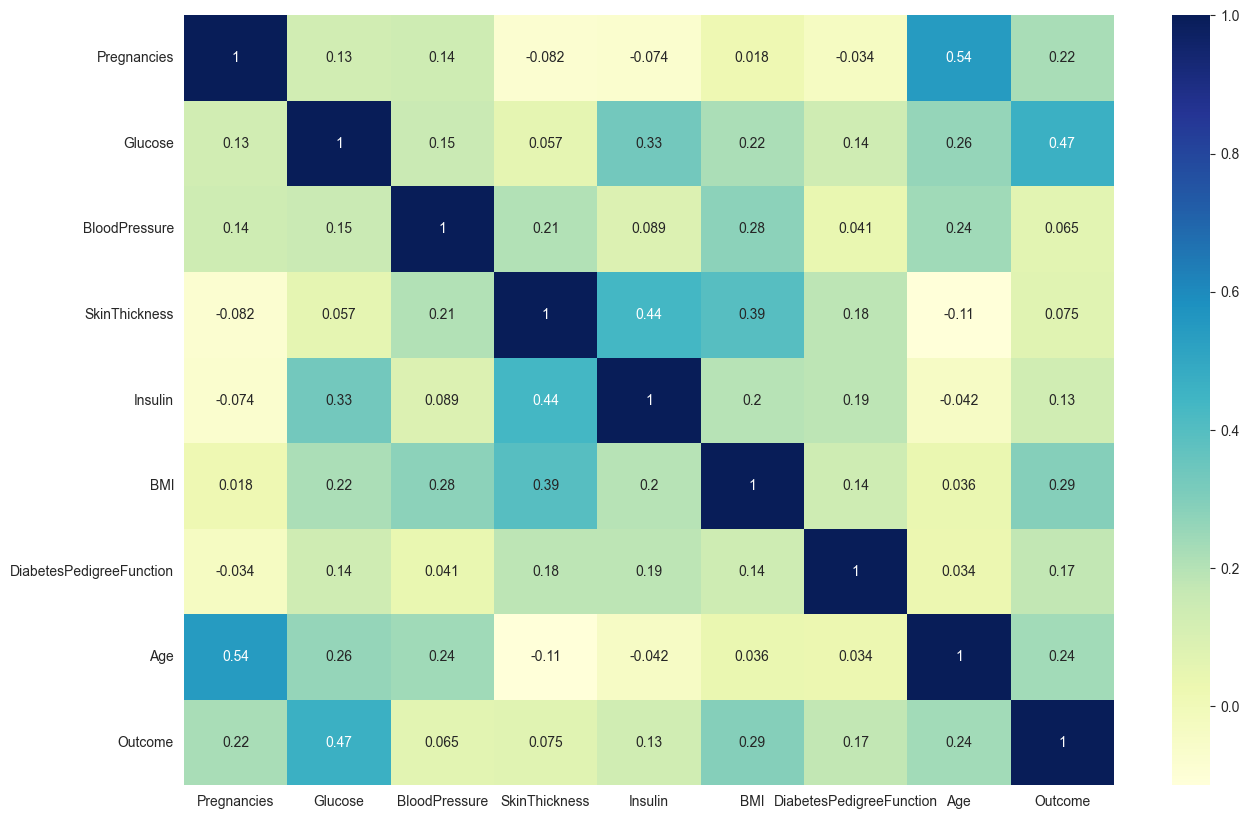

In [21]:

plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True)

Özellik verilerini ve sonuç verilerini ayırma

In [22]:
X = data.drop("Outcome", axis=1)
Y = data['Outcome']

Özellikler veri seti

In [23]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


Sonuçlar veri seti

In [24]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

Modelin daha iyi tahminler yapmasına ve hesaplama süresini kısaltmasına yardımcı olmak için verileri belirli bir aralığa göre standartlaştırma (-1 ile 1 arasında)

StandardScaler, bir veri kümesindeki özellikleri standartlaştırmak için z-skor yöntemini kullanır.

In [25]:
scaler = StandardScaler()

Veri kümenizdeki her özellik (sütun) için ortalamayı ve standart sapmayı hesaplar. Bu değerleri öğrenir ancak henüz verileri dönüştürmez.

In [26]:
scaler.fit(X)

StandardScaler()

Burada scaler örneğinden aldığımız bilgileri kullanarak verilerini standartlaştırılır

In [27]:
standardized_data = scaler.transform(X)

In [28]:
standardized_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]], shape=(768, 8))

özellik verilerini standartlaştırılmış verilerle atıyoruz

In [29]:
X = standardized_data

Verileri eğitim verileri ve test verileri olarak ikiye ayırıyoruz

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=12)

Destek vektör makinesi modelini başlattık

In [31]:
classifier = svm.SVC(kernel='linear')

Burada model eğitim verilerini kullanarak öğreniyor

In [32]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Test verileri kullanıldığında modelin doğruluk puanı

In [34]:
y_pred = classifier.predict(X_test)

Modelin karışıklık matrisi

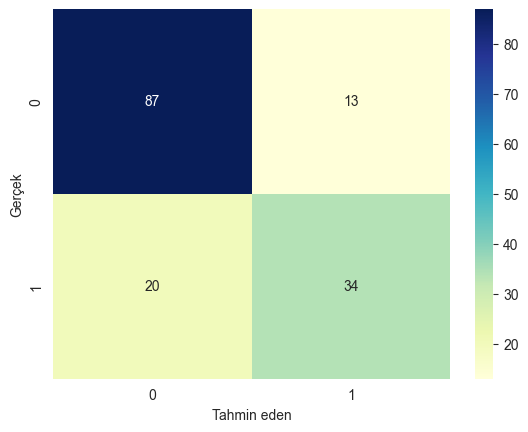

In [37]:
cm = confusion_matrix(Y_test, classifier.predict(X_test))
sns.heatmap(cm, annot=True, cmap='YlGnBu')
plt.xlabel('Tahmin eden')
plt.ylabel('Gerçek')
plt.show()

Sınıflama Performansını Değerlendirme Ölçütleri

In [46]:
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

print(f"Doğruluk: {accuracy}")
print(f"Hassasiyet: {precision}")
print(f"Duyarlılık: {recall}")
print(f"F1 Skor: {f1}")

Doğruluk: 0.7857142857142857
Hassasiyet: 0.723404255319149
Duyarlılık: 0.6296296296296297
F1 Skor: 0.6732673267326733
